# CS 6220 Assignment 8A

## Part 1

In [1]:
import pandas as pd

# Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Attribute Information:
# 1. Age of patient at time of operation (numerical)
# 2. Patient's year of operation (year - 1900, numerical)
# 3. Number of positive axillary nodes detected (numerical)
# 4. Survival status (class attribute)
# -- 1 = the patient survived 5 years or longer
# -- 2 = the patient died within 5 year
data = pd.read_csv(fileURL, names=['Age', 'Year of operation', 'Number of positive axillary nodes', 'Survival status'], 
                   header=None)
data.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

The chosen dataset is Haberman's Survival Data Set. The data consists of four features in total: three numerical predictive features (age of patient at time of operation, patient's year of operation past 1900, and number of positive axillary nodes detected) and one binomial class attribute (survival status: 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year). The number of instances is 306. The nature of the data is cases from a study conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. I think this dataset is very helpful for giving insights on patients' survival status after breast cancer operation between 1950s and 1970s and training model to predict new test cases. If more recent data is available, we may have an opportunity to see how medical advances impact breast cancer patients' survival.

## Part 2

In [2]:
# Compute and display summary statistics for each feature available in the dataset
summary = data.describe(include='all')
summary

,Age,Year of operation,Number of positive axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


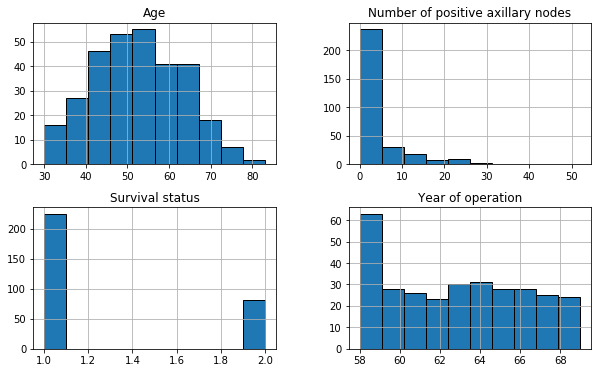

In [3]:
# Create a histogram for each feature in the dataset
histogram = data.hist(edgecolor='k', figsize=(10,6))

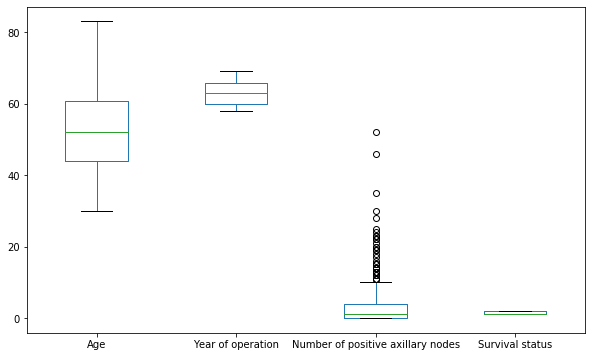

In [4]:
# Create a boxplot for each feature in the dataset
boxplot = data.boxplot(grid=False, return_type='axes', figsize=(10,6))

In [5]:
survival = data.groupby('Survival status').size().sort_values(ascending=False)
survival

Survival status
1    225
2     81
dtype: int64

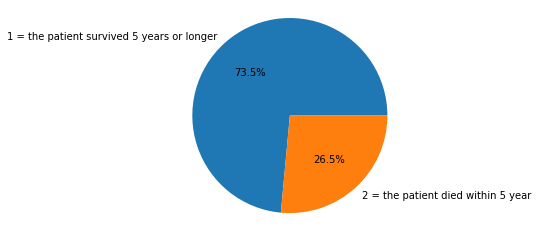

In [6]:
import matplotlib.pyplot as plt

# Create a pie plot for survival status feature in the dataset
labels = '1 = the patient survived 5 years or longer', '2 = the patient died within 5 year'
sizes = [survival.values[0], survival.values[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.

The dataset doesn't have missing data. The three predictive features (age of patient at time of operation, patient's year of operation past 1900, and number of positive axillary nodes detected) are numeric (integer). The class attribute (survival status: 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year) is categorical (binomial). The histograms, boxplot, and pie plot are shown above. Histogram provides a graphical representation of the distribution of the data. The shape of the histogram for age is closer to a normal bell-shaped distribution. The shapes of the histograms for year of operation and number of positive axillary nodes are both positively skewed. Boxplot provides a graphical representation of the location and variation of the data through their quartiles. A lot of outliers for number of positive axillary nodes are observed on the boxplot. Pie plot provides a proportional representation of the numerical data. For survival status results, 73.5% breast cancer patients survived 5 years or longer after operation.

## Part 3

### 3. Using scikit-learn's DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X = data[['Age', 'Year of operation', 'Number of positive axillary nodes']]
y = data['Survival status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn import tree
from sklearn import metrics

# Create classifier and train the model to generate predicions
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Display model accuracy
print("Model accuracy:", metrics.accuracy_score(y_test, y_pred))

Model accuracy: 0.6413043478260869


## Part 4

### 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

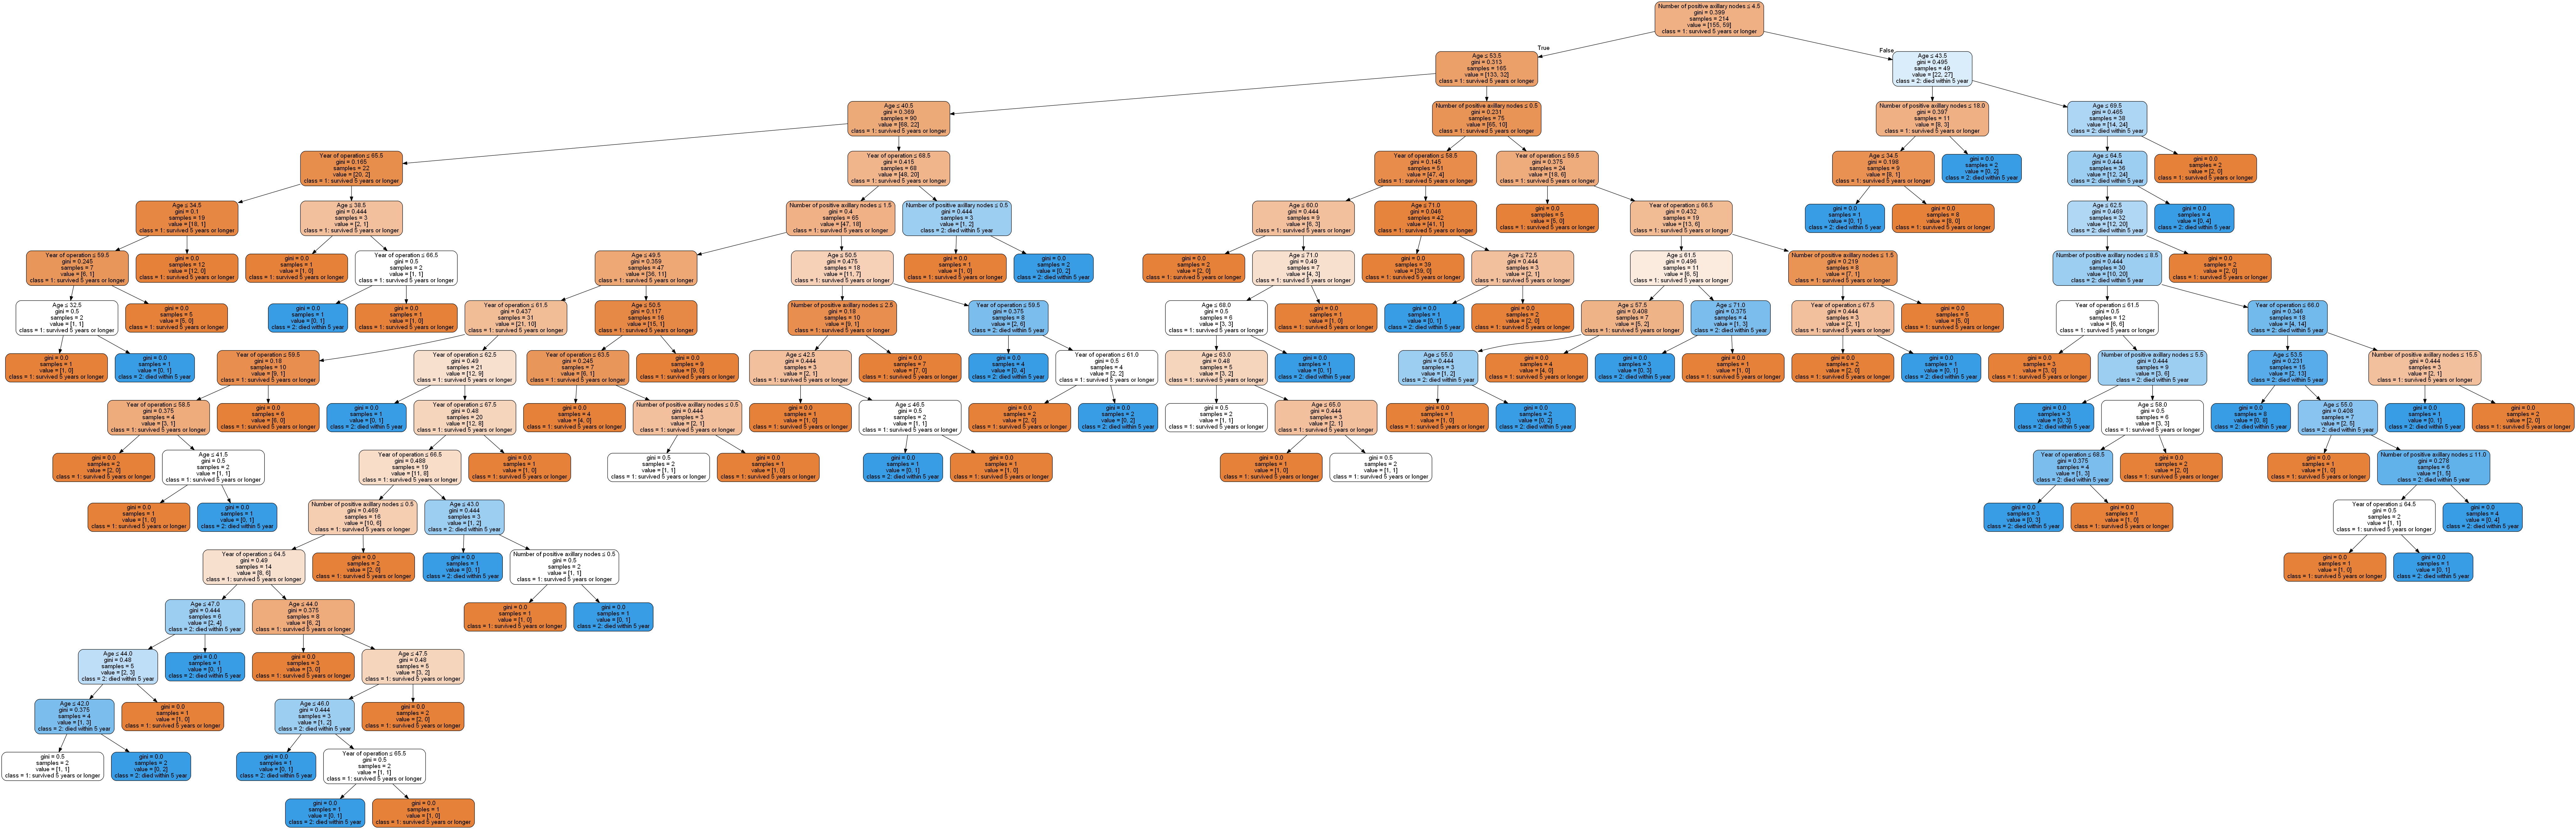

In [9]:
from IPython.display import Image
import graphviz
import pydotplus

# Generate the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['Age', 'Year of operation', 
            'Number of positive axillary nodes'], class_names=['1: survived 5 years or longer', '2: died within 5 year'], 
            filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

## Part 5

### 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [10]:
# New instance (Age: 60, Year of operation: 68, Number of positive axillary nodes: 3)
clf.predict([[60, 68, 3]])

array([1], dtype=int64)

For new instance (Age: 60, Year of operation: 68, Number of positive axillary nodes: 3), the trained model predicts survival status to be 1 = the patient survived 5 years or longer. The result makes sense because it is consistent with the result obtained by traversing the decision tree. For the new instance, in decision tree, we traverse (Number of positive axillary nodes <= 4.5 : True) -> (Age <= 53.5 : False) -> (Number of positive axillary nodes <= 0.5: False) -> (Year of operation <= 59.5: False) -> (Year of operation <= 66.5: False) -> (Number of positive axillary nodes <= 1.5: False) -> (class = 1: survived 5 years or longer).

The model can be improved by tuning the parameters of the decision tree classifier. For example, by setting criterion="entropy", and max_depth=3 for decision tree classifier, we obtain better model accuracy, increasing from 0.64 to 0.76.

In [11]:
# Create classifier and train the model to generate predicions
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Display model accuracy
print("Model accuracy:", metrics.accuracy_score(y_test, y_pred))

Model accuracy: 0.7608695652173914


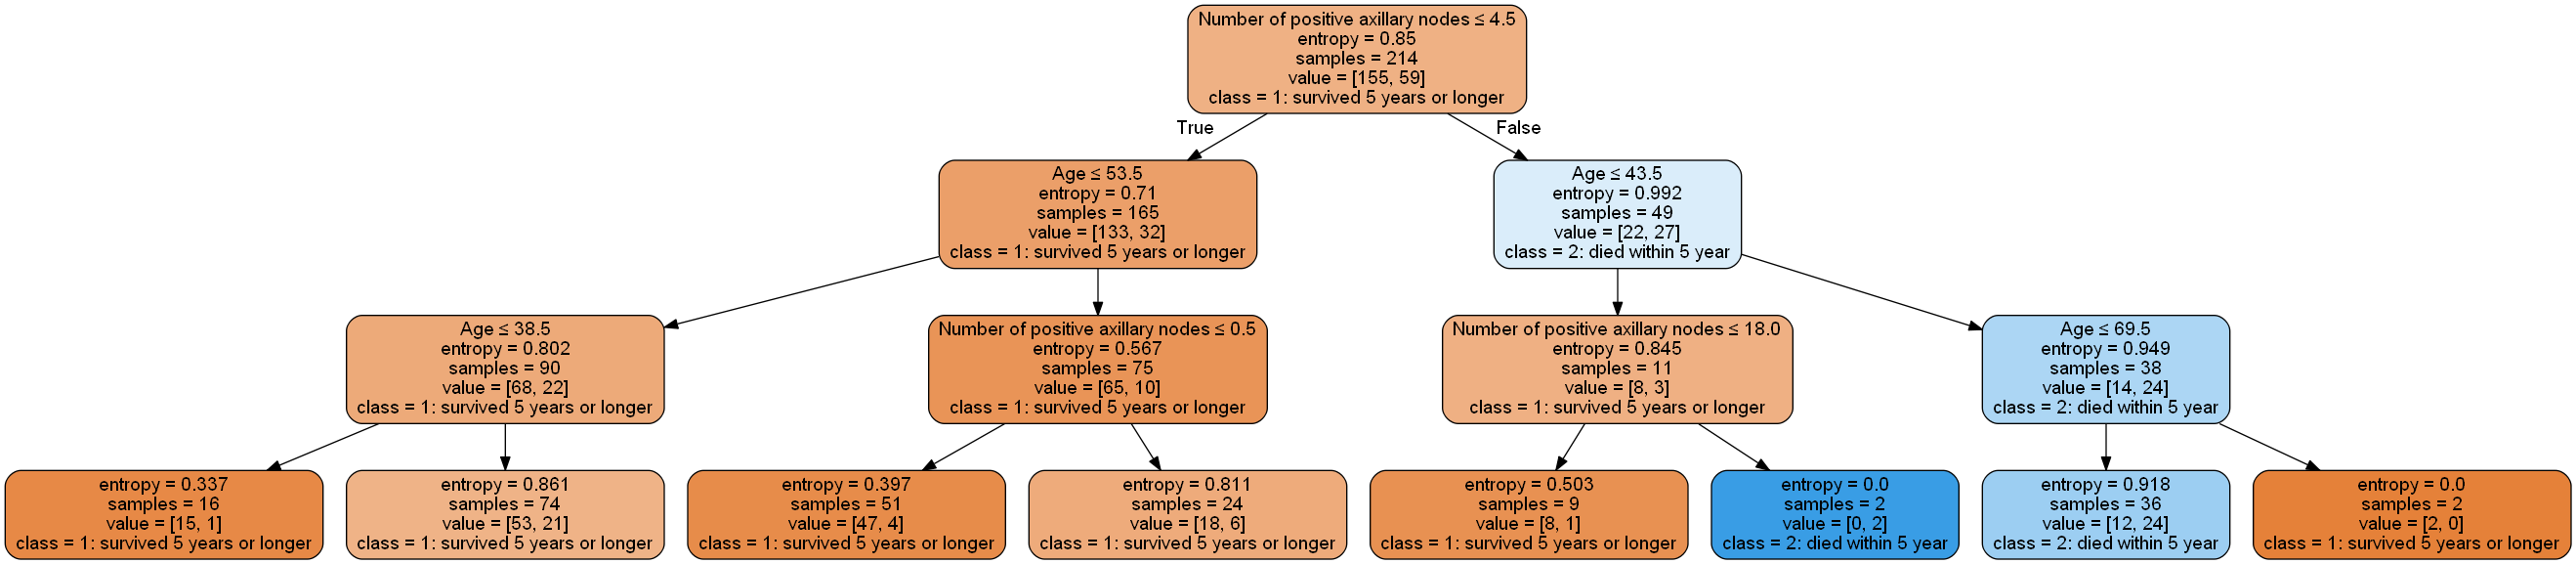

In [12]:
# Generate the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['Age', 'Year of operation', 
            'Number of positive axillary nodes'], class_names=['1: survived 5 years or longer', '2: died within 5 year'], 
            filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

In [13]:
# New instance (Age: 60, Year of operation: 68, Number of positive axillary nodes: 3)
clf.predict([[60, 68, 3]])

array([1], dtype=int64)

The prediction generated by the trained model is still correct, remains the same as the previous prediction that survival status is 1 = the patient survived 5 years or longer as we expected. For the instance, in new decision tree, we traverse (Number of positive axillary nodes <= 4.5 : True) -> (Age <= 53.5 : False) -> (Number of positive axillary nodes <= 0.5: False) -> (class = 1: survived 5 years or longer).